### Relevante pakker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [2]:
df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Theme', 'Pieces', 'Price','Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# det er dataset dere skal bruke!
df2

,Theme,Pieces,Price,Unique_Pieces
0,DOTS,109.0,3.99,6.0
1,DOTS,109.0,3.99,6.0
2,Classic,52.0,4.99,28.0
3,Classic,60.0,4.99,36.0
4,DOTS,33.0,4.99,10.0
...,...,...,...,...
1299,LEGO Education,528.0,329.95,108.0
1300,LEGO Super Mario,205.0,29.99,114.0
1301,LEGO Super Mario,464.0,69.99,195.0
1302,LEGO Super Mario,1010.0,99.99,346.0


In [4]:
# Gruppere temaer i nye grupper:
# (Gruppe 1 er superhelter, andre er fantasy og siste er udefinerte temaer.)
df2['cat'] = np.where(df2['Theme'].isin(['Marvel', 'Star Wars', 'Disney','Spider-Man','LEGO Frozen 2']), 'Disney lisensiert', 
                      np.where(df2['Theme'].isin(['DC', 'Batman', 'Harry Potter', 'Disney','Minecraft', 'Jurassic World', 'Overwatch','Minions', 'Unikitty', 'Stranger Things','Powerpuff Girls']), 'Andre lisensierte kategorier', 'Udefinerte kategorier'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

,cat,Count
0,Andre lisensierte kategorier,115
1,Disney lisensiert,217
2,Udefinerte kategorier,662


In [5]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

,cat,Theme,Count
0,Andre lisensierte kategorier,Batman,16
1,Andre lisensierte kategorier,DC,9
2,Andre lisensierte kategorier,Harry Potter,25
3,Andre lisensierte kategorier,Jurassic World,20
4,Andre lisensierte kategorier,Minecraft,26
5,Andre lisensierte kategorier,Minions,2
6,Andre lisensierte kategorier,Overwatch,8
7,Andre lisensierte kategorier,Powerpuff Girls,2
8,Andre lisensierte kategorier,Stranger Things,1
9,Andre lisensierte kategorier,Unikitty,6


### Mer eller mindre relevante kodesnutter

In [6]:
print(df2.mean(numeric_only = True))

Pieces           442.131791
Price             47.816258
Unique_Pieces    132.452716
dtype: float64


In [7]:
print(df2['Theme'].value_counts())

Theme
Star Wars              114
Friends                101
City                   100
NINJAGO                 78
DUPLO                   51
Marvel                  50
Disney                  43
Creator 3-in-1          38
Technic                 38
BrickHeadz              32
Minecraft               26
THE LEGO MOVIE 2        26
Harry Potter            25
Classic                 21
Jurassic World          20
Hidden Side             19
DOTS                    18
Speed Champions         18
Batman                  16
LEGO Super Mario        16
Creator Expert          15
Powered UP              13
Monkie Kid              12
Ideas                   12
Juniors                 12
Architecture            11
DC                       9
Trolls World Tour        9
Xtra                     8
LEGO Frozen 2            8
Overwatch                8
Unikitty                 6
LEGO Education           5
LEGO Art                 4
Minifigures              3
Spider-Man               2
Powerpuff Girls       

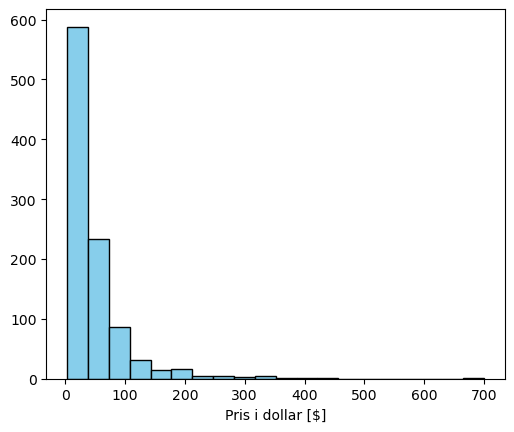

In [8]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

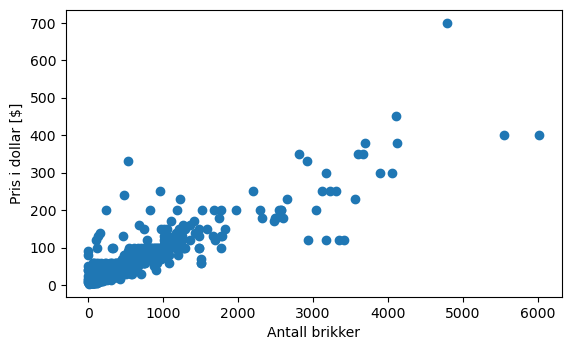

In [9]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

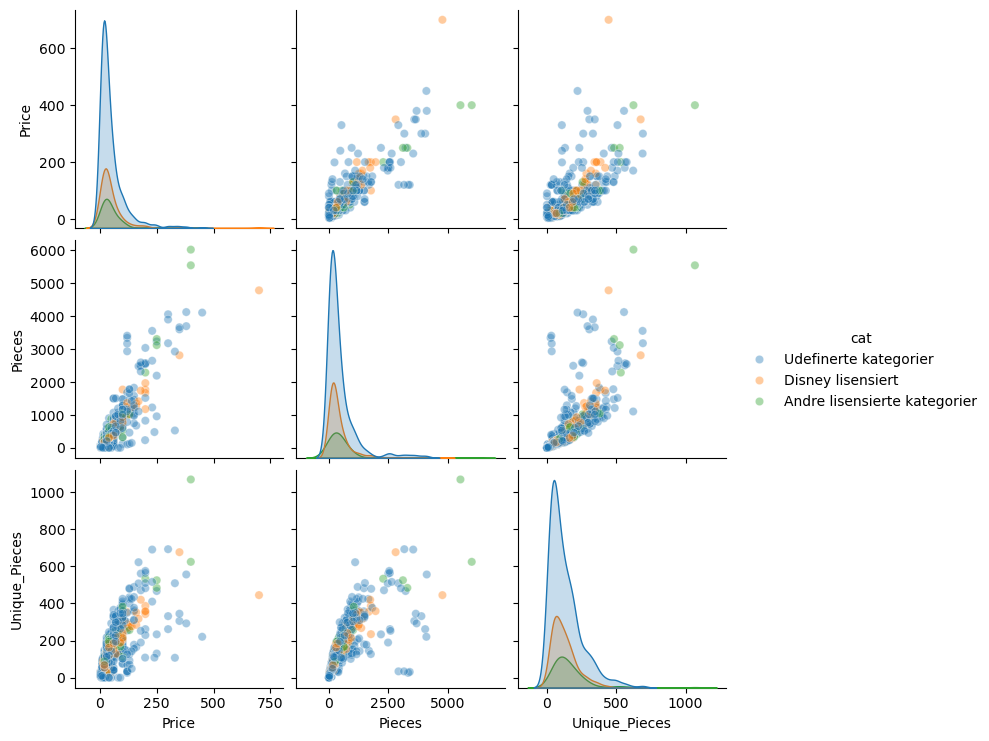

In [10]:
sns.pairplot(df2, vars=['Price', 'Pieces', 'Unique_Pieces'],
             hue='cat', 
             diag_kind='kde',
             plot_kws=dict(alpha=0.4))
plt.show()

In [19]:
# enkel lineær regresjon
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     3736.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:15:11   Log-Likelihood:                -4696.2
No. Observations:                 994   AIC:                             9396.
Df Residuals:                     992   BIC:                             9406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8122      1.047     11.281      0.000       9.757      13.867
Pieces         0.0814      0.001     61.127      0.000       0.079       0.084
==============================================================================
Omnibus:                      790.567   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51482.516
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      37.709   Cond. No.                         951.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

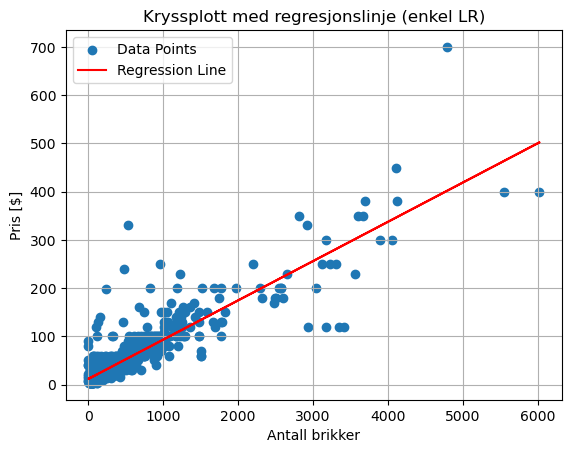

In [20]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

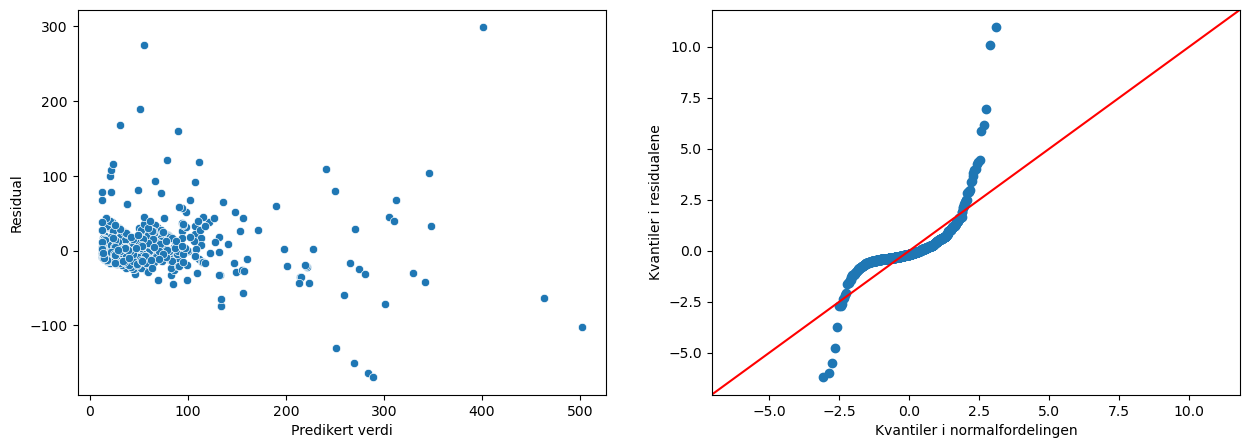

In [21]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

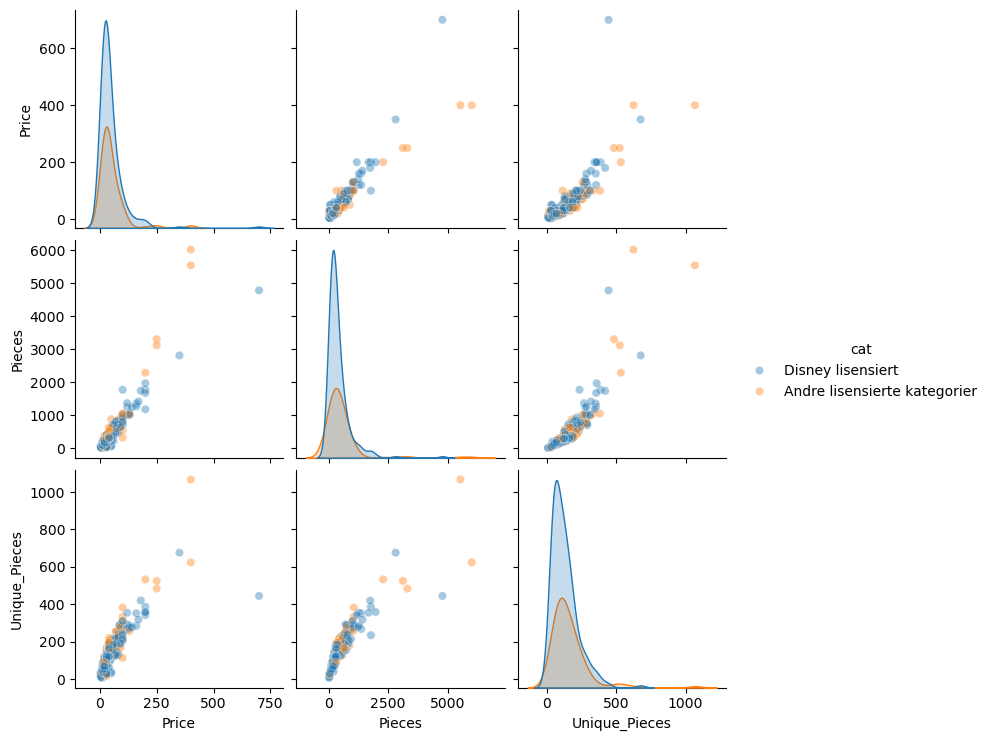

In [22]:
# Define the themes you want to include in subset_df
mythemes = ['Marvel', 'Star Wars', 'Disney', 'Spider-Man', 'LEGO Frozen 2', 
            'DC', 'Batman', 'Harry Potter', 'Minecraft', 'Jurassic World', 
            'Overwatch', 'Minions', 'Unikitty', 'Stranger Things', 'Powerpuff Girls']

# Define the categories in the 'cat' column based on Theme
df2['cat'] = np.where(df2['Theme'].isin(['Marvel', 'Star Wars', 'Disney','Spider-Man','LEGO Frozen 2']), 'Disney lisensiert', 
                      np.where(df2['Theme'].isin(['DC', 'Batman', 'Harry Potter', 'Disney','Minecraft', 'Jurassic World', 'Overwatch','Minions', 'Unikitty', 'Stranger Things','Powerpuff Girls']), 'Andre lisensierte kategorier', 'Udefinerte kategorier'))

# Create subset_df with only relevant themes
subset_df = df2[df2['Theme'].isin(mythemes)]

# Create pairplot with 'cat' as hue
sns.pairplot(subset_df, vars=['Price', 'Pieces', 'Unique_Pieces'],
             hue='cat', 
             diag_kind='kde',
             plot_kws=dict(alpha=0.4))
plt.show()


Index(['Theme', 'Pieces', 'Price', 'Unique_Pieces', 'cat'], dtype='object')


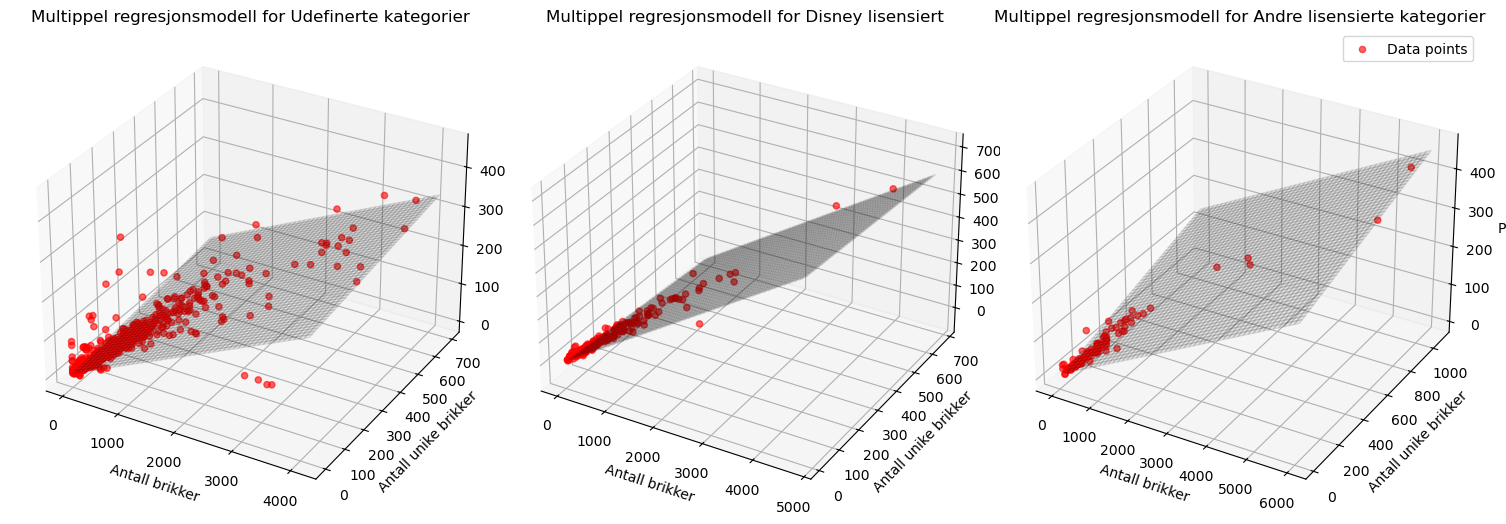

In [29]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df2 is your DataFrame that has been defined earlier
# Create the 'cat' column based on the 'Theme' column
df2['cat'] = np.where(df2['Theme'].isin(['Marvel', 'Star Wars', 'Disney', 'Spider-Man', 'LEGO Frozen 2']), 'Disney lisensiert', 
                      np.where(df2['Theme'].isin(['DC', 'Batman', 'Harry Potter', 'Disney', 'Minecraft', 'Jurassic World', 'Overwatch', 'Minions', 'Unikitty', 'Stranger Things', 'Powerpuff Girls']), 'Andre lisensierte kategorier', 'Udefinerte kategorier'))

# Verify the 'cat' column is created
print(df2.columns)  # This should include 'cat'

# Create a dictionary of DataFrames for each category
categories = df2['cat'].unique()  # Get unique categories
subset_dfs = {cat: df2[df2['cat'] == cat] for cat in categories}  # Create a dictionary of dataframes for each category

# Create 3D plots for each category
fig = plt.figure(figsize=(15, 10))

for i, cat in enumerate(categories):
    subset_df = subset_dfs[cat]  # Get the subset for the current category
    
    # Lag en multippel lineær regresjonsmodell for 'Price' med 'Pieces' og 'Unique_Pieces' som forklaringsvariabler
    modell_mlr = smf.ols('Price ~ Pieces + Unique_Pieces', data=subset_df).fit()
    
    # Hent modellparametere
    intercept = modell_mlr.params['Intercept']
    slope_pieces = modell_mlr.params['Pieces']
    slope_unique_pieces = modell_mlr.params['Unique_Pieces']
    
    # Sett opp verdier for forklaringsvariablene for 3D-overflaten
    pieces_range = np.linspace(subset_df['Pieces'].min(), subset_df['Pieces'].max(), 50)
    unique_pieces_range = np.linspace(subset_df['Unique_Pieces'].min(), subset_df['Unique_Pieces'].max(), 50)
    pieces_grid, unique_pieces_grid = np.meshgrid(pieces_range, unique_pieces_range)
    
    # Beregn prisene basert på modellen
    price_grid = intercept + slope_pieces * pieces_grid + slope_unique_pieces * unique_pieces_grid
    
    # Create a new subplot for each category
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    
    # Plotter datapunktene
    ax.scatter(subset_df['Pieces'], subset_df['Unique_Pieces'], subset_df['Price'], color='red', alpha=0.6, label='Data points')
    
    # Plotter regresjonsplanet
    ax.plot_surface(pieces_grid, unique_pieces_grid, price_grid, color='grey', alpha=0.1, edgecolor='k')
    
    # Akse-etiketter og tittel med kategorinavn
    ax.set_xlabel('Antall brikker')
    ax.set_ylabel('Antall unike brikker')
    ax.set_zlabel('Pris')
    ax.set_title(f'Multippel regresjonsmodell for {cat}')  # Set title to include category name

plt.tight_layout()
plt.legend()
plt.show()




In [38]:
formel2 = 'Price ~ Pieces + Unique_Pieces'

modell = smf.ols(formel2, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1969.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:03:06   Log-Likelihood:                -4675.0
No. Observations:                 994   AIC:                             9356.
Df Residuals:                     991   BIC:                             9371.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.3189      1.323      4.776      0.000       3.723       8.915
Pieces            0.0711      0.002     34.782      0.000       0.067       0.075
Unique_Pieces     0.0760      0.012      6.572      0.000       0.053       0.099
==============================================================================
Omnibus:                      945.648   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72237.866
Skew:                           4.118   Prob(JB):                         0.00
Kurtosis:                      43.943   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces + cat' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     2004.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           9.51e-74
Time:                        10:02:46   Log-Likelihood:                -469.07
No. Observations:                 115   AIC:                             942.1
Df Residuals:                     113   BIC:                             947.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2007      1.575      9.018      0.000      11.081      17.320
Pieces         0.0709      0.002     44.770      0.000       0.068       0.074
==============================================================================
Omnibus:                       40.549   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.396
Skew:                           1.347   Prob(JB):                     1.58e-22
Kurtosis:                       6.700   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

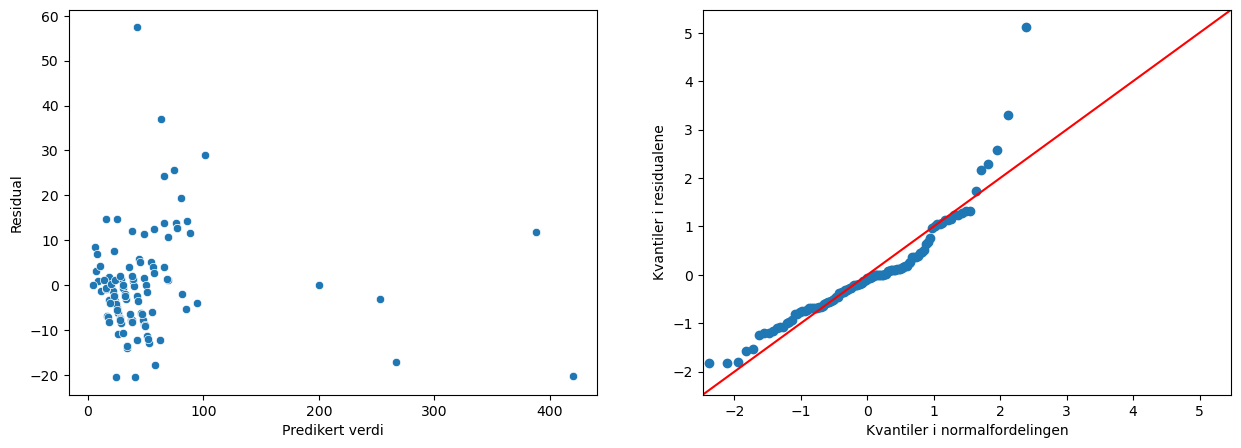

In [35]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()